# 네이버 실시간 검색 30위 크롤링
1. 네이버 실시간 검색 순위 크롤링(1시간마다 반복)
2. SQL로 저장 
3. 종목별 순위 변동 차트로 구성
* 크롤링 사이트 : http://finance.naver.com/sise/lastsearch2.nhn

In [1]:
import numpy as np
import pandas as pd
import pandas.io.sql as sql
from pandas import DataFrame, Series

from lxml import html, cssselect
import requests

import sqlite3

from datetime import datetime
import time

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')
matplotlib.rc('font', family='Malgun Gothic')
% matplotlib inline

In [2]:
'''
== 파이썬 3.x 버젼으로 작성 ==

== 로직 ==
1. 네이버증권 실시간 검색 상위 30종목 한시간 단위로 크롤링
2. SQL 데이터 베이스에 저장
(X 30회 반복)
   
3. 상위종목별 시간대별 순위변동 및 주가 차트 구성
'''


''' 결과물 저장할 쿼리 테이블 생성 '''
con = sqlite3.connect('naver_db.sqlite')

'''
query = """
CREATE TABLE naver_stock_rank
(date VARCHAR(20), rank INTEGER,
 stock VARCHAR(30)
);"""
con.execute(query)
con.commit()
'''

# 테이블 삭제코드
# query = """ DROP Table if Exists "naver_stock_rank" """
#con.execute(query)
#con.commit()

'\nquery = """\nCREATE TABLE naver_stock_rank\n(date VARCHAR(20), rank INTEGER,\n stock VARCHAR(30)\n);"""\ncon.execute(query)\ncon.commit()\n'

In [ ]:
''' 네이버 증권 검색 '''
def url_elem(u):
    url = u
    resp = requests.get(url)
    return html.fromstring(resp.text)
    
def naver_db():
    elem = url_elem('http://finance.naver.com/sise/lastsearch2.nhn')
        
    st = []
    for i in elem.cssselect('a.tltle'):  
        if i.text_content() != '':   
            st.append(i.text_content().strip())
                
    # 검색시간
    today = datetime.today()
    dt = today.strftime('%Y-%m-%d %H:%M:%S')
    
    # 순위(30개 수집 안되는 경우도 있을 수 있음. ex: 새벽
    # N = np.arange(1,31)
    N = np.arange(1,len(st)+1)
    
    # return DataFrame({'date':[dt] * 30, 'rank':N, 'stock':st}) # , index=None, columns=None)
    return DataFrame({'date':[dt] * len(st), 'rank':N, 'stock':st}) # , index=None, columns=None)

for i in range(8460):  # 1년: 시작일자 2017.04.14 8:38분
    try:
        df = naver_db()
        
        # 테이블 insert
        # https://www.ryanbaumann.com/blog/2016/4/30/python-pandas-tosql-only-insert-new-rows
        df.to_sql('naver_stock_rank', con, if_exists='append', index=False)
        
    except:
        print("################")
        print("웹 크롤링 오류 : 작업시간")
        print(datetime.today().strftime('%Y-%m-%d %H:%M:%S'))
        print("################")
      
    time.sleep(3600) # 1시간 지연

In [3]:
'''
특정 종목 시간별 순위 차트 그리기
rank 값 변환 1위 -> 30위로 ...
'''
# 테이블 읽기
df_final = pd.read_sql('select * from naver_stock_rank', con)
df_final['rank_new'] = 31 - df_final['rank']
df_final.head()

,date,rank,stock,rank_new
0,2017-03-30 09:45:35,1,미래산업,30
1,2017-03-30 09:45:35,2,안랩,29
2,2017-03-30 09:45:35,3,LG전자,28
3,2017-03-30 09:45:35,4,우리들제약,27
4,2017-03-30 09:45:35,5,아남전자,26


In [54]:
df_final.tail(31)

,date,rank,stock,rank_new
19944,2017-05-08 14:37:30,30,삼부토건,1
19945,2017-05-08 15:37:30,1,삼성전자,30
19946,2017-05-08 15:37:30,2,LG전자,29
19947,2017-05-08 15:37:30,3,안랩,28
19948,2017-05-08 15:37:30,4,SK하이닉스,27
19949,2017-05-08 15:37:30,5,한미약품,26
19950,2017-05-08 15:37:30,6,크린앤사이언스,25
19951,2017-05-08 15:37:30,7,셀트리온,24
19952,2017-05-08 15:37:30,8,아모레퍼시픽,23
19953,2017-05-08 15:37:30,9,기아차,22


In [6]:
df_final.describe().round(1)

,rank,rank_new
count,19975.0,19975.0
mean,15.5,15.5
std,8.6,8.6
min,1.0,1.0
25%,8.0,8.0
50%,15.0,16.0
75%,23.0,23.0
max,30.0,30.0


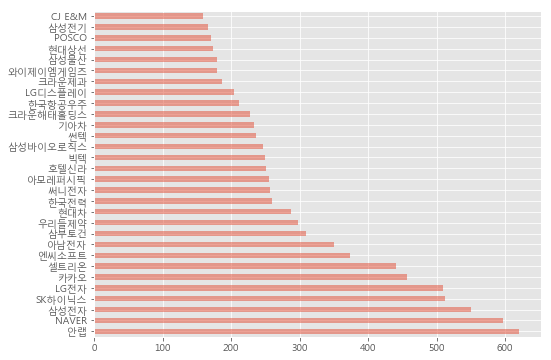

In [7]:
'''종목별 30시간 동안 실검 30위에 머문 횟수(상위 30종목)'''
df_final['stock'].value_counts()[:30].plot(kind='barh', alpha=0.5, figsize=(8,6))

In [48]:
'''종목별 시계열 차트 : 최근 10일 '''
def time_chart(stock_nm):
    #1. 모든 시간대 포함 마스터 만들기
    ser_2 = Series([100]*len(df_final['date'].value_counts()))
    ser_2.index = pd.to_datetime(df_final['date'].value_counts().index)
    ser_2.name = 'rank_opt'

    #2. 특정 종목 건수 만들기
    df_stock = df_final[ df_final['stock'] == stock_nm ]
    ser = Series(df_stock['rank_new'])
    ser.index = pd.to_datetime(df_stock['date'])

    #3. 결측값(30위권 밖)인 경우 0으로 보정하기
    df_fff = pd.concat([ser_2,ser], axis=1)
    df_fff.drop(['rank_opt'], axis=1, inplace=True)
    df_fff.fillna(0, inplace=True)
    # print( df_fff.tail(10) )

    # df_fff.index
    df_ch = df_fff.tail(240)   ############ 최근 10일(240시간)
    fig, ax = plt.subplots(figsize=(20,4))

    ax.bar(df_ch.index, df_ch['rank_new'], width=0.05, alpha=0.5)
    ax.set_ylim([0,31])
    ax.set_yticklabels([30,25,20,15,10,5,1])    
    #ax.set_xlabel('Performance')
    ax.set_title('네이버 실시간 검색 순위: ' + stock_nm)
    plt.show()

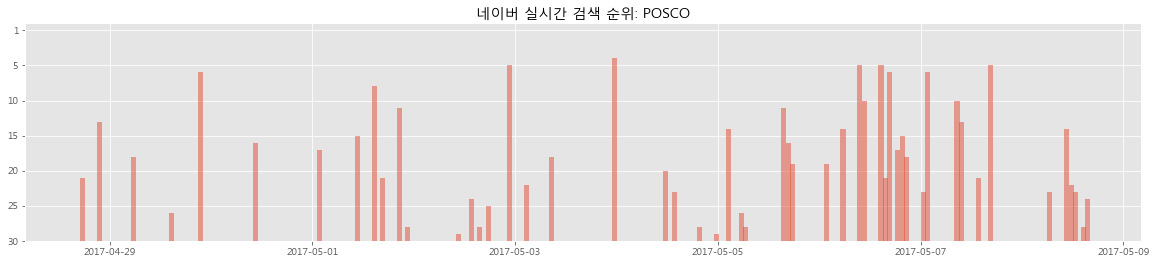

In [49]:
time_chart('POSCO')

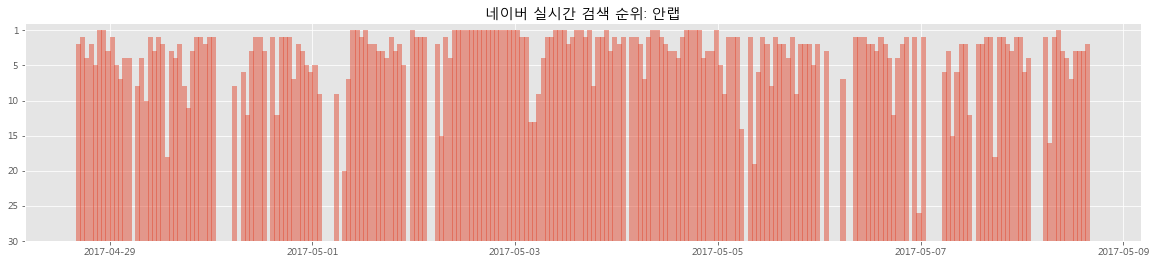

In [50]:
time_chart('안랩')

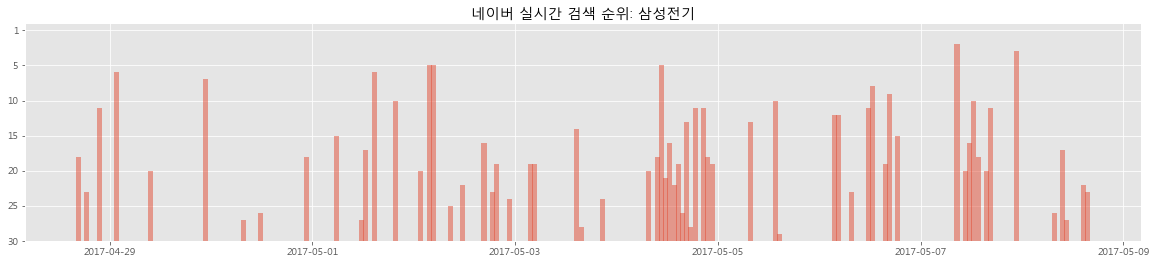

In [51]:
time_chart('삼성전기')

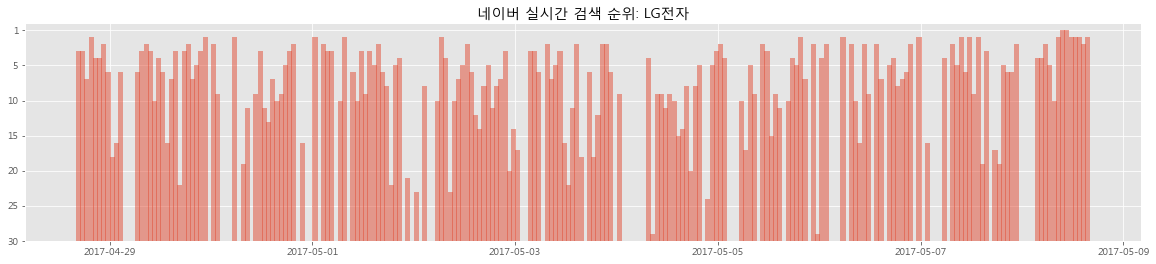

In [52]:
time_chart('LG전자')

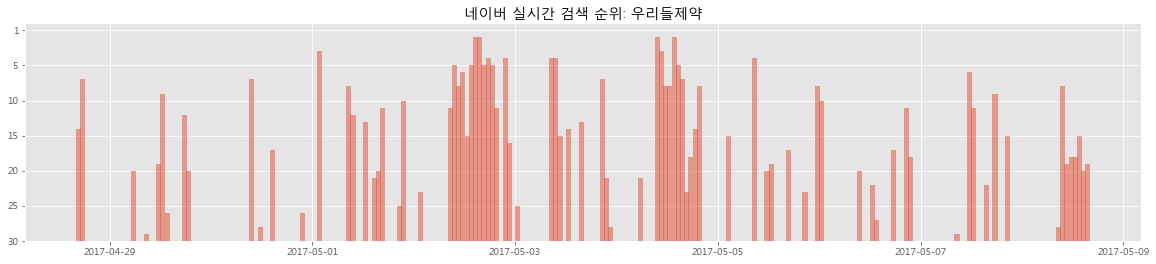

In [53]:
time_chart('우리들제약')

In [ ]:
''' 
아래부터는 작업용 참조 코드 ..........
'''

In [23]:
""" url -> elem 객체 생성 함수 """
def url_elem(u):
    url = u
    resp = requests.get(url)
    return html.fromstring(resp.text)

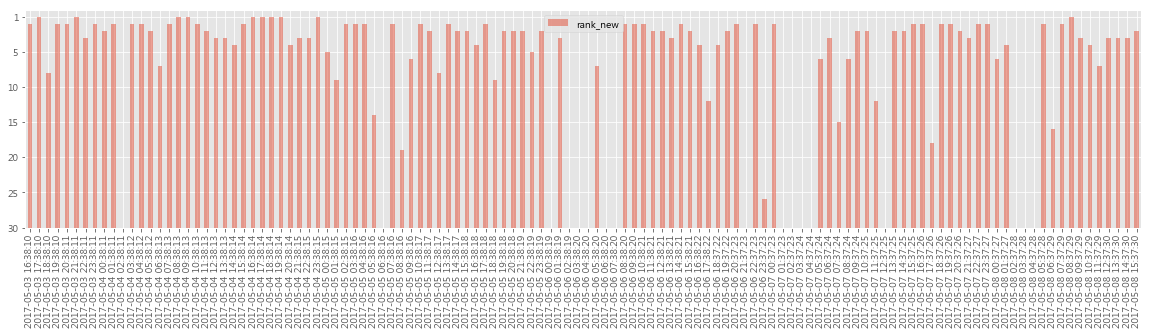

In [36]:
#1. 모든 시간대 포함 마스터 만들기
ser_2 = Series([100]*len(df_final['date'].value_counts()))
ser_2.index = pd.to_datetime(df_final['date'].value_counts().index)
ser_2.name = 'rank_opt'

#2. 특정 종목 건수 만들기
df_stock = df_final[ df_final['stock'] == '안랩' ]
ser = Series(df_stock['rank_new'])
ser.index = pd.to_datetime(df_stock['date'])

#3. 결측값(30위권 밖)인 경우 0으로 보정하기
df_fff = pd.concat([ser_2,ser], axis=1)
df_fff.drop(['rank_opt'], axis=1, inplace=True)
df_fff.fillna(0, inplace=True)
# print( df_fff.tail(10) )

#4. 차트 그림
# title_str = '네이버 실시간 검색 순위: ' + stock_nm
# ax = df_fff['rank_new'].plot(kind='bar', rot=90)
ax = df_fff.tail(120).plot(kind='bar', figsize=(20,4), alpha=0.5)  # 최종 120시간
ax.set_ylim([0,31])
ax.set_yticklabels([30,25,20,15,10,5,1])    
plt.show()
# ax.set_title(title_str)

# ser_2[:10]
# ser[10:]


In [72]:
# 네이버 증권 검색
elem = url_elem('http://finance.naver.com/sise/lastsearch2.nhn')

st = []
for i in elem.cssselect('a.tltle'):  
    if i.text_content() != '':   
        st.append(i.text_content().strip())

# 검색시간
today = datetime.today()
dt = today.strftime('%Y-%m-%d %H:%M:%S')

# 순위
N = np.arange(1,31)

In [73]:
df = DataFrame({'date':[dt] * 30, 'rank':N, 'stock':st}) # , index=None, columns=None)
# df = DataFrame({[dt]*30, N, st}, index=None, columns=None)

In [79]:
def naver_db():
    elem = url_elem('http://finance.naver.com/sise/lastsearch2.nhn')
    
    st = []
    for i in elem.cssselect('a.tltle'):  
        if i.text_content() != '':   
            st.append(i.text_content().strip())
            
    # 검색시간
    today = datetime.today()
    dt = today.strftime('%Y-%m-%d %H:%M:%S')
    
    # 순위
    N = np.arange(1,31)
    
    return DataFrame({'date':[dt] * 30, 'rank':N, 'stock':st}) # , index=None, columns=None)

df = naver_db()
df

,date,rank,stock
0,2017-03-28 18:06:26,1,안랩
1,2017-03-28 18:06:26,2,우리들제약
2,2017-03-28 18:06:26,3,성지건설
3,2017-03-28 18:06:26,4,써니전자
4,2017-03-28 18:06:26,5,넥스트칩
5,2017-03-28 18:06:26,6,모비스
6,2017-03-28 18:06:26,7,LG전자
7,2017-03-28 18:06:26,8,영진약품
8,2017-03-28 18:06:26,9,LG화학
9,2017-03-28 18:06:26,10,세우글로벌


In [44]:
# 테이블 생성
con = sqlite3.connect('naver_db.sqlite')

In [ ]:
query = """
CREATE TABLE naver_stock_rank
(date VARCHAR(20), rank INTEGER,
 stock VARCHAR(30)
);"""
con.execute(query)
con.commit()

In [83]:
# 테이블 삭제
query = """ DROP Table if Exists "naver_stock_rank" """
con.execute(query)
#con.colse()
#con.execute(query)
#con.commit()

In [74]:
# 테이블 insert
# https://www.ryanbaumann.com/blog/2016/4/30/python-pandas-tosql-only-insert-new-rows
df.to_sql('naver_stock_rank', con, if_exists='append', index=False)

In [ ]:
# 테이블 읽기
pd.read_sql('select * from naver_stock_rank', con)

In [89]:
for i in range(5):
    # print(time.time())
    time.sleep(3600) # 1시간 지연